<a href="https://colab.research.google.com/github/saeed815/housing-analysis/blob/main/housing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/realtor-data.csv")

In [ ]:
data['Log Sale Price'] = np.log(data['price'])

<ipython-input-409-a2ff8318e78c>:1: FutureWarning: The operation <function mean at 0x7f0975e55360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  beds = data.groupby(['bed']).agg(np.mean)[['Log Sale Price']].reset_index()


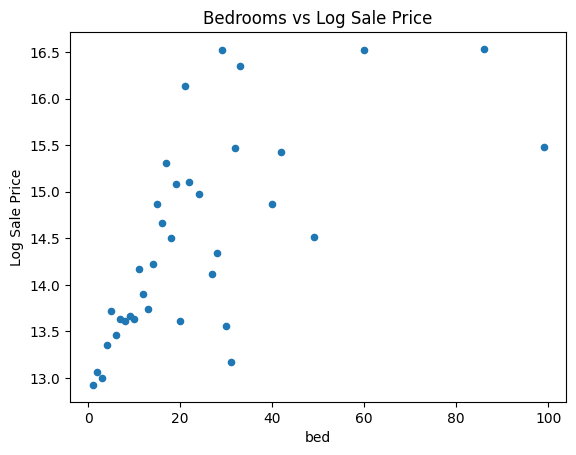

In [ ]:
beds = data.groupby(['bed']).agg(np.mean)[['Log Sale Price']].reset_index()
beds['bed'] = beds['bed'].astype(int)
beds = beds.sort_values('bed')
beds.plot.scatter(x= "bed", y= "Log Sale Price")
plt.title('Bedrooms vs Log Sale Price');

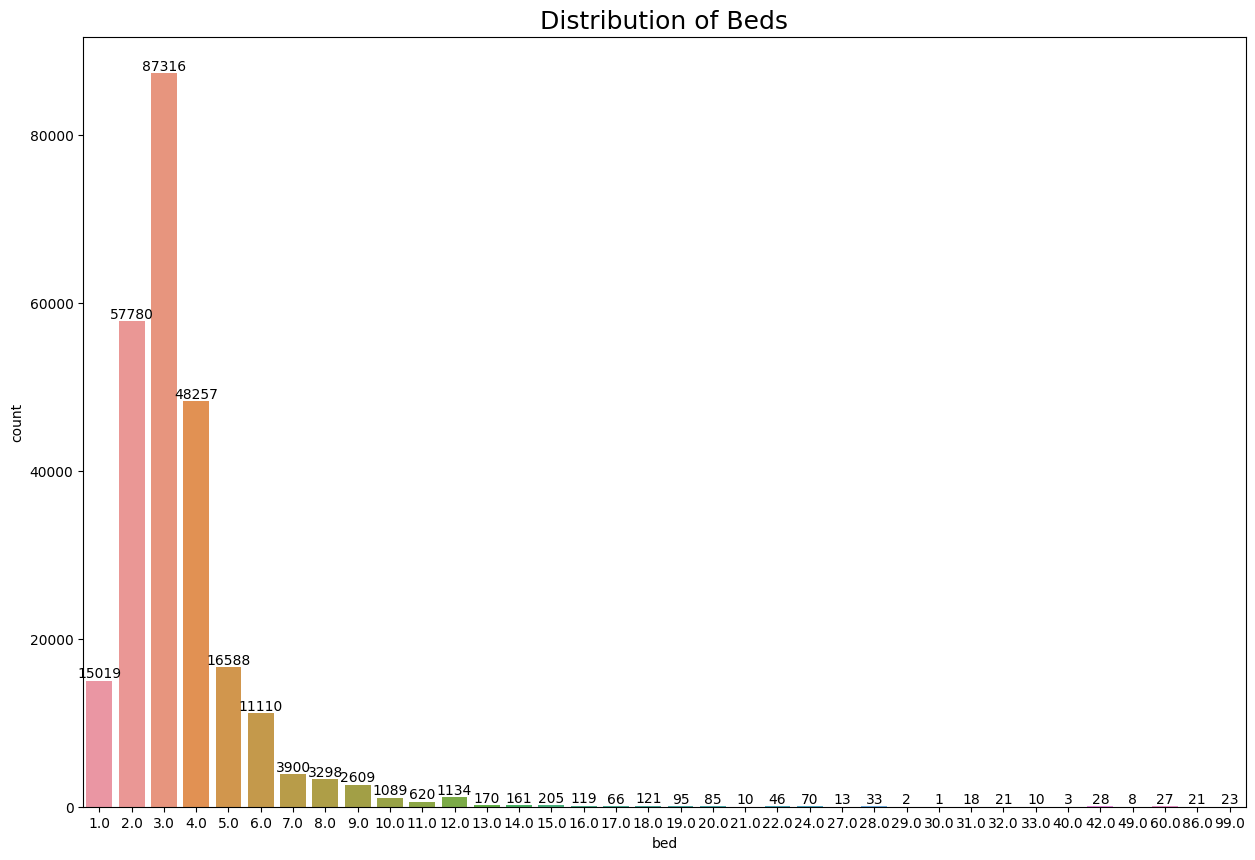

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(data=data, x='bed')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Beds', fontsize=18)
plt.show()

<ipython-input-411-99f7f5f71144>:1: FutureWarning: The operation <function mean at 0x7f0975e55360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  beds = data.groupby(['bath']).agg(np.mean)[['Log Sale Price']].reset_index()


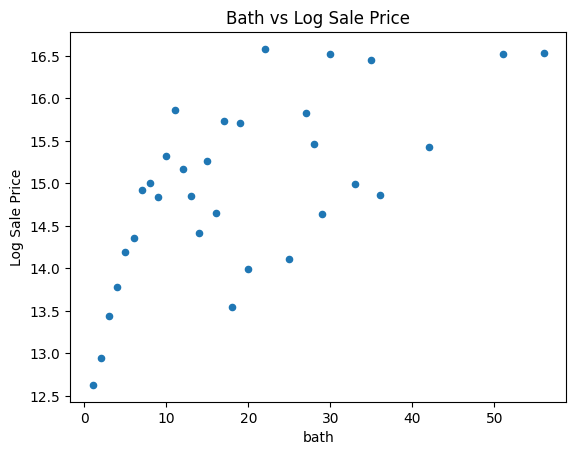

In [ ]:
beds = data.groupby(['bath']).agg(np.mean)[['Log Sale Price']].reset_index()
beds['bath'] = beds['bath'].astype(int)
beds['bath'] = beds[beds['bath'] < 100]['bath']
beds = beds.sort_values('bath')
beds.plot.scatter(x= "bath", y= "Log Sale Price")
plt.title('Bath vs Log Sale Price');

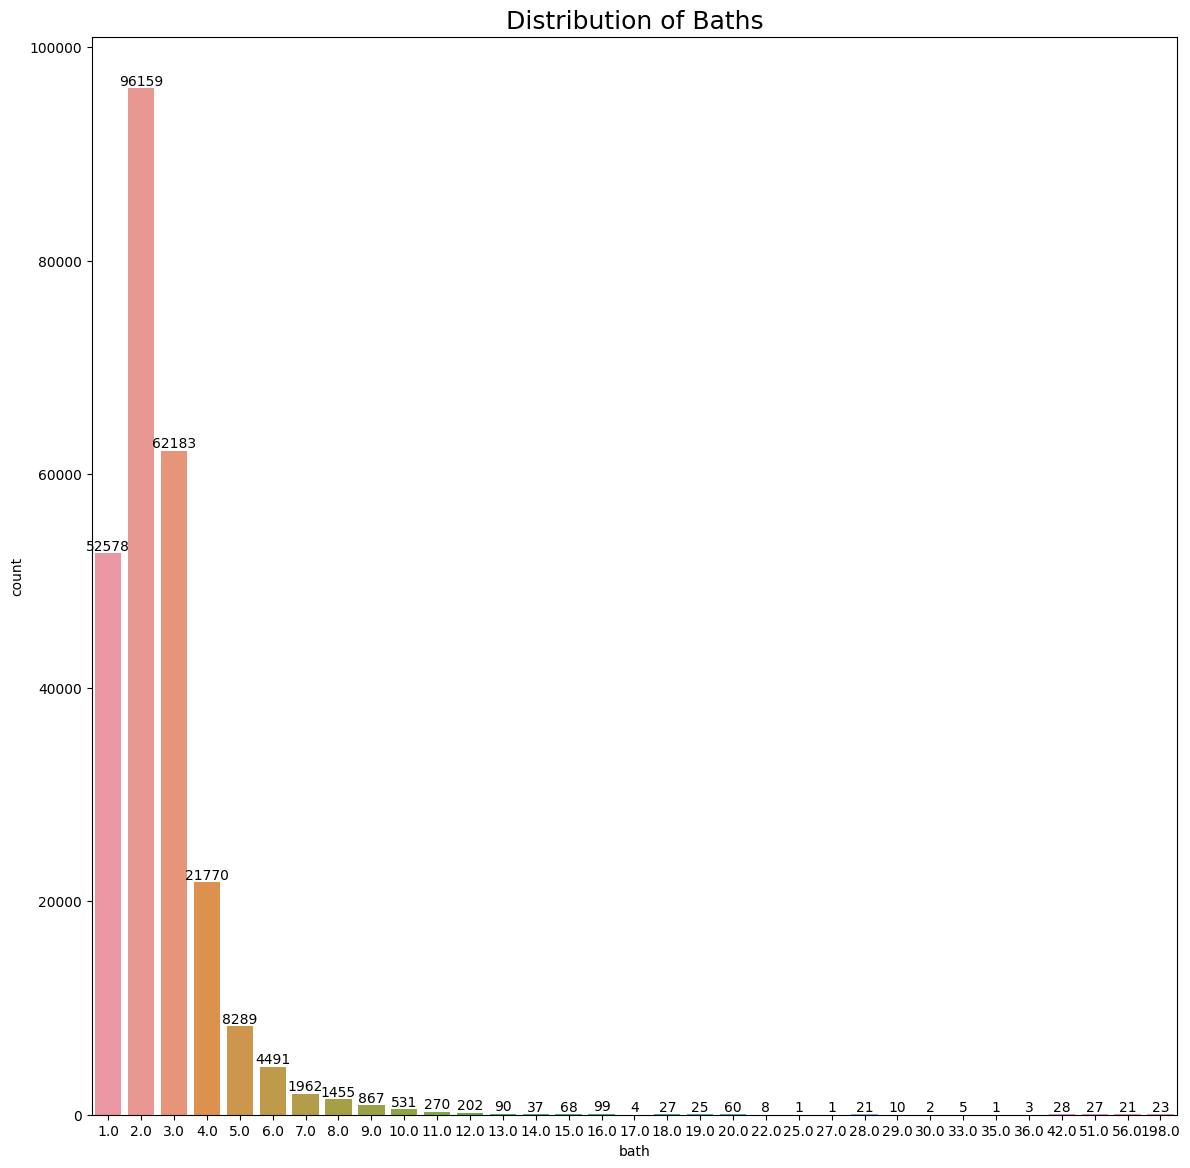

In [ ]:
plt.figure(figsize=(14,14))
ax = sns.countplot(data=data, x='bath')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Baths', fontsize=18)
plt.show()

<ipython-input-413-ae6f2963d7b1>:1: FutureWarning: The operation <function mean at 0x7f0975e55360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  beds = data.groupby(['house_size']).agg(np.mean)[['Log Sale Price']].reset_index()


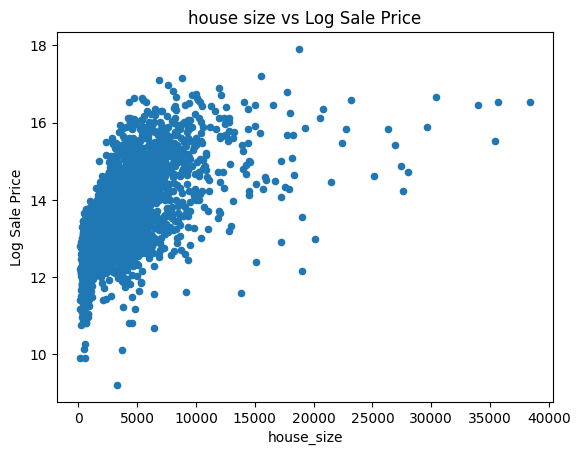

In [ ]:
beds = data.groupby(['house_size']).agg(np.mean)[['Log Sale Price']].reset_index()
beds['house_size'] = beds['house_size'].astype(int)
beds['house_size'] = beds[beds['house_size'] < 40000]['house_size']
beds = beds.sort_values('house_size')
beds.plot.scatter(x= "house_size", y= "Log Sale Price")
plt.title('house size vs Log Sale Price');

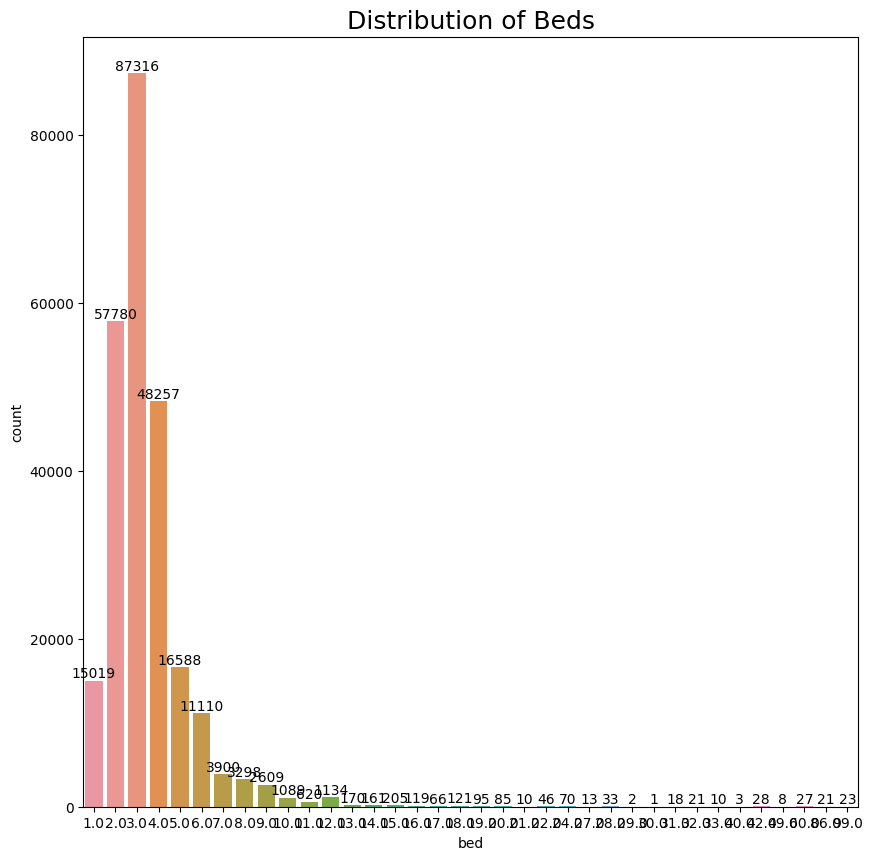

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.countplot(data=data, x='bed')
for i in ax.containers:
  ax.bar_label(i,)
plt.title('Distribution of Beds', fontsize=18)
plt.show()

<ipython-input-415-0799f5e898fc>:1: FutureWarning: The operation <function mean at 0x7f0975e55360> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  beds = data.groupby(['acre_lot']).agg(np.mean)[['Log Sale Price']].reset_index()


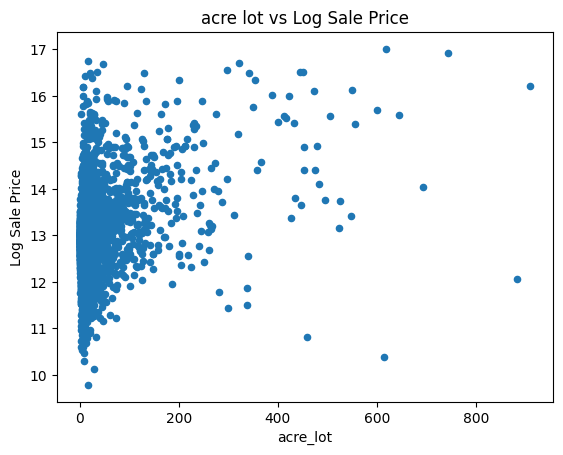

In [ ]:
beds = data.groupby(['acre_lot']).agg(np.mean)[['Log Sale Price']].reset_index()
beds = beds[beds['Log Sale Price'] > 5]
beds['acre_lot'] = beds['acre_lot'].astype(int)
beds['acre_lot'] = beds[beds['acre_lot'] < 1000]['acre_lot']
beds = beds.sort_values('acre_lot')
beds.plot.scatter(x= "acre_lot", y= "Log Sale Price")
plt.title('acre lot vs Log Sale Price');

In [ ]:
data.dropna(inplace = True)

In [ ]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed

    Output:
      a winsorized data frame with outliers removed

    Note: This function should not change mutate the contents of data.
    """
    bound_upper = data[data[variable] < upper]
    bound_lower = bound_upper[bound_upper[variable] > lower]
    return bound_lower

In [ ]:
data = remove_outliers(data, "price", data['price'].quantile(0.1), data['price'].quantile(0.9))

In [ ]:
data['prev_sold_date'] = pd.to_datetime(data.prev_sold_date)
date_col = pd.DatetimeIndex(data['prev_sold_date'])
data['Years'] = date_col.year
data['Month'] = date_col.month
#data['Day'] = date_col.day

In [ ]:
data = data3

In [ ]:
X = pd.get_dummies(data,columns = ['state'])
y = X["price"]
X = X.drop(["price","city", "status", "prev_sold_date"], axis=1)

In [ ]:
#enc_city = (data.groupby('city').size())
#data['enc_city'] = data['city'].apply(lambda x : enc_city[x])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=295)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
reg = LinearRegression().fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
#mean_squared_error(y_test, y_pred)
#mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)

0.9438705373042972

In [ ]:
forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

#r2_score(y_test, y_pred)
mean_squared_error(y_test, y_pred)
#mean_absolute_error(y_test, y_pred)

58990789.79592079

In [ ]:
knn = KNeighborsRegressor(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
knn.predict(X_test_scaled)

knn_score = knn.score(X_test_scaled,y_test)
knn_score

0.9852545491410427

In [ ]:
data[["bed", "bath", "acre_lot", "house_size", "price", "Years", "Month"]].corr()

,bed,bath,acre_lot,house_size,price,Years,Month
bed,1.000000,0.543767,-0.004921,0.655584,0.153349,-0.035850,-0.025600
bath,0.543767,1.000000,0.008826,0.732212,0.443634,-0.053747,-0.012925
acre_lot,-0.004921,0.008826,1.000000,-0.002970,-0.010649,0.016633,0.006703
house_size,0.655584,0.732212,-0.002970,1.000000,0.413267,-0.045424,-0.013037
price,0.153349,0.443634,-0.010649,0.413267,1.000000,-0.165139,-0.017764
Years,-0.035850,-0.053747,0.016633,-0.045424,-0.165139,1.000000,-0.016824
Month,-0.025600,-0.012925,0.006703,-0.013037,-0.017764,-0.016824,1.000000


In [ ]:

models = {"Linear Regression": LinearRegression(),"Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    outcome.append(cv_result)

names = list(models.keys())
means = []
for array in outcome:
  means.append(np.mean(array))

for i in range(len(outcome)):
  print(names[i]," : ", means[i])

Linear Regression  :  0.9444493579301948
Random Forest  :  0.9992367787252324
KNN  :  0.9888926694673438
